<a href="https://colab.research.google.com/github/Kori04/CSC445Final/blob/main/Markdown_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Evolution of cooperation

Code examples from [Think Complexity, 2nd edition](https://thinkcomplex.com).

Copyright 2016 Allen Downey, [MIT License](http://opensource.org/licenses/MIT)

Code Enhancements and Write Up : Andrea Ola, Kori Kobylak

# Introduction
The Prisoner's Dilemma is a game theory problem which analyzes what people will do when presented with the choice to perform an act in secret which can get them larger payoffs if the other player(s) don't do the same thing. In the version the game gets its name from, two prisoners are presented a choice, they can either snitch or not snitch. If both choose to not snitch they will each get an equally long sentence of four years. If one chooses to snitch and the other doesn't the one who snitches will get one year and the one who didn't will get 6 years. However, if they both choose to snitch they will each get 5 years. So, what is the optimal choice? That is what this will explore looking at both long term and short terms games of the prisoner's dilemma.

The way we simulate this is by utilizing a tournament style to determine which Prisoner's Dilemma strategies come out on top after playing for a length of chosen time. We do this by killing off the weakest strategies and slightly changing strategies that did well to figure out the best over time.  We analyze this overtime evolution using 5 data sets. (Kuhn, 2019)


*   Mean Fitness - This is the average score of all agents over time
*   Niceness - Average number of Cs in agents across all agents
*   Opening - Average number of agents who started by cooperating
*   Retaliation - Difference between number of agents who when snitched on, retaliate on the next step and who cooperate
*   Forgiving - Average number of agents who forgive defection while the defection is still in memory

These five data points allow us to closely view what changes in agents over time and what types of strategies will come out on top. In early tournaments different agents were submitted and pitted against each other to see what would come out on top. We have recreated a similar experiment below but for now you just need to know in the original experiment Tit for Tat (TfT) came out on top. (Tobin)

Agents are composed of 7 Cs and or Ds with each one telling it what to do based on the oponent's last two actions. Let us break this down by looking at TfT and what its Cooperate (Cs) and Defect (Ds) can tell us about it.

The Seven letter string for TfT is as follows, 'CCDCDCD'
- The First C means it will always start by cooperating
- The Second C means that if the opponent chooses to Cooperate then TfT will cooperate again on the second move
- The First D means that, if the opponent chooses to defect in the first move then TfT will defect on the second move

From here the rest of these letters will apply to the last two moves the opponent made starting with,
- The Third C means that if the opponent cooperated for the past two moves than TfT will as well
- The Second D means that if the opponent cooperated and then defected then TfT will defect on the next move
- The Final C meants that if the opponent defected and then cooperated then TfT will cooperate again
- And the final D means that if the opponent defected twice recently then TfT will defect.

This makes Tit for Tat a strategy that is nice meaning it cooperates first, but it is also relaitory as it will retaliate if something defects. But it also is forgiving, meaning that if the opponent after defecting goes back cooperating then TfT will as well. And finally it is clear, making it easy to use for mutual improvement. (Kuhn, 2019)

##Code Enhancements
###Enhancing the Code with a Round-Robin Tournament Method
In simulations such as the Prisoner’s Dilemma, evaluating the interactions between agents is crucial to understand the dynamics of different strategies. The original code employs a Melee Tournament, where each agent interacts with two neighbors (where the interactions can be chosen randomly, depending on whether the randomize parameter is set to True). While this approach is computationally efficient, it introduces randomness in pairings and provides only a limited view of how strategies perform across a population. By adding a Round-Robin Tournament method, we can significantly enhance the analysis, ensuring that each agent interacts with every other agent in the population. This allows for a more comprehensive and unbiased evaluation of strategy performance (Kretz, 2010).

The Round-Robin Tournament addresses the limitations of the Melee Tournament by eliminating pairing bias and providing a complete view of strategy performance. In the Melee Tournament, fitness is based on interactions with only two opponents per step, which limits the evaluation of an agent’s effectiveness across the population. In contrast, the Round-Robin Tournament ensures that every agent competes against all others, providing fitness values that reflect a strategy’s overall performance. These fitness values are calculated from the total score of all matches and normalized by the number of matches per agent and the number of rounds per match, enabling fair and consistent comparisons. This approach makes the Round-Robin method especially effective for analyzing diverse strategies.

**How the Round-Robin Method Works**
The round_robin method ensures every agent interacts with all others in the population:
A nested loop iterates over all pairs of agents.
1. A nested loop iterates over all pairs of agents.
2. Each pair plays a multi-round match using the play method.
3. Scores from all matches are accumulated for each agent.
4. Fitness values are computed as the average score per match, normalized by the number of matches and rounds played.
For example, in a population of three agents:
  Agent 0 plays against Agent 1, Agent 2, and itself.
  Agent 1 plays against Agent 0, Agent 2, and itself.
  Agent 2 plays against Agent 0, Agent 1, and itself.
  For this scenario, at the end of the tournament, all agents will have played two matches, and their fitness values will reflect their average performance across those matches.
**New Special Agents**
In addition adding a new interaction method, we expanded the set of strategies available for agents by adding three new strategies to complement the already-implemented Always Cooperate, Always Defect, and Tit-for-Tat. The new strategies include:
* No Forgiveness (nf): Represented as Agent('CCDCDDD'), this strategy starts with cooperation but gradually shifts to defection with no intention to return to cooperation.
* Backstabbing (back): Represented as Agent('CDCDCDC'), this strategy alternates between cooperation and defection, mimicking unstable or deceptive behavior.
* Start with Defection (StartDef): Represented as Agent('DCCCCCC'), this strategy begins with defection but shifts to cooperation in subsequent interactions.
These new strategies provide a richer simulation by introducing behaviors that mimic real-world complexities, such as gradual betrayal, alternating trust, and a willingness to change tactics. By analyzing interactions among this expanded pool of strategies, we can gain deeper insights into the dynamics of cooperation, defection, and trust-building.
##Demonstration
For our demonstration, we ran a simulation focused entirely on the Backstabbing Agent, using a population of 100 agents over 2,500 steps. This allowed us to observe how this strategy evolved and interacted within its group.
Graphs tracking metrics such as mean fitness, niceness, retaliation, and forgiveness highlighted dynamic fluctuations in strategy effectiveness over time. The results revealed that, while initially biased toward defecting behaviors, the population gradually stabilized with agents adopting a mix of cooperative and strategic defecting optimize fitness.

**Interactive Simulation Setup**

Finally, we made the simulation setup more user-friendly by allowing users to input custom configurations, including the agent genome, population size, and the number of simulation steps. This interactive setup makes the simulation more accessible for testing various scenarios and observing diverse outcomes.

*For more detailed results you can view the Designed Simulation section.*
##Critique
Future Enhancements: Implementing Memory-Size-Three Strategies
While we think that implmenting a new type of tournamnet and new special gents added some new interesting features to study, we believe that in the future expanding to memory-size-three strategies offers an exciting opportunity to analyze more complex decision-making processes. These strategies consider the outcomes of the last three rounds of interactions, enabling agents to make decisions based on more information collected from previous rounds (Kretz, 2010).
To implement this enhancement, we would need to:
* Extend the agent's memory to store three rounds of interaction history.
* Adjust the agent's strategy dictionary to include 64 keys, representing all possible combinations of outcomes for three rounds.
* Update the respond method to use these keys for determining actions.
While this change increases computational complexity due to the larger strategy space, it significantly enriches the analysis by introducing more intricate decision-making possibilities. This could reveal new dynamics in how strategies compete and adapt over time, offering insights into behaviors that cannot emerge with simpler memory strategies.

## Code Writeup Segement

Below is all code, complexity analysis, and an analysis of specific simulation





### Previous code (Untouched)

From the Chapter 11 notebook, we will reuse `Simulation` and `Instrument`.

Since code in this section is mostly set-up code any code in here is set-up and stays either O(n) or O(1), this is because no other operations apart from variable set-up, simple calculations, or use of single for loops are done.

*See comment below each method to for found complexity.*

In [1]:
class Simulation:

    def __init__(self, fit_land, agents):
        """Create the simulation:

        fit_land: fit_land
        num_agents: int number of agents
        agent_maker: function that makes agents
        """
        self.fit_land = fit_land
        self.agents = np.asarray(agents)
        self.instruments = []
        #Complexity O(1)

    def add_instrument(self, instrument):
        """Adds an instrument to the list.

        instrument: Instrument object
        """
        self.instruments.append(instrument)
         #Complexity O(1)

    def plot(self, index, *args, **kwargs):
        """Plot the results from the indicated instrument.
        """
        self.instruments[index].plot(*args, **kwargs)
         #Complexity O(1)

    def run(self, num_steps=500):
        """Run the given number of steps.

        num_steps: integer
        """
        # initialize any instruments before starting
        self.update_instruments()

        for _ in range(num_steps):
            self.step()
         #Complexity O(n) where n is number of steps

    def step(self):
        """Simulate a time step and update the instruments.
        """
        n = len(self.agents)
        fits = self.get_fitnesses()

        # see who dies
        index_dead = self.choose_dead(fits)
        num_dead = len(index_dead)

        # replace the dead with copies of the living
        replacements = self.choose_replacements(num_dead, fits)
        self.agents[index_dead] = replacements

        # update any instruments
        self.update_instruments()

        #Complexity O(1)

    def update_instruments(self):
        for instrument in self.instruments:
            instrument.update(self)
         #Complexity O(n) where n is the number of instruments we are working with

    def get_locs(self):
        """Returns a list of agent locations."""
        return [tuple(agent.loc) for agent in self.agents]
        #Complexity O(n) where n is number of agents

    def get_fitnesses(self):
        """Returns an array of agent fitnesses."""
        fits = [agent.fitness for agent in self.agents]
        return np.array(fits)
        #Complexity O(n) where n is number of agents

    def choose_dead(self, ps):
        """Choose which agents die in the next timestep.

        ps: probability of survival for each agent

        returns: indices of the chosen ones
        """
        n = len(self.agents)
        is_dead = np.random.random(n) < 0.1
        index_dead = np.nonzero(is_dead)[0]
        return index_dead
        #Complexity O(n) where n is number of agents in the array

    def choose_replacements(self, n, weights):
        """Choose which agents reproduce in the next timestep.

        n: number of choices
        weights: array of weights

        returns: sequence of Agent objects
        """
        agents = np.random.choice(self.agents, size=n, replace=True)
        replacements = [agent.copy() for agent in agents]
        return replacements
        #Complexity O(n) where n is number of choices

In [2]:
class Instrument:
    """Computes a metric at each timestep."""

    def __init__(self):
        self.metrics = []
        #Complexity O(1)

    def update(self, sim):
        """Compute the current metric.

        Appends to self.metrics.

        sim: Simulation object
        """
        # child classes should implement this method
        pass
        #Complexity O(1)

    def plot(self, **options):
        plt.plot(self.metrics, **options)
        #Complexity O(1)

In [3]:
class MeanFitness(Instrument):
    """Computes mean fitness at each timestep."""
    label = 'Mean fitness'

    def update(self, sim):
        mean = np.nanmean(sim.get_fitnesses())
        self.metrics.append(mean)
        #Complexity O(1)

In [4]:
import os
if not os.path.exists('utils.py'):
    !wget https://raw.githubusercontent.com/AllenDowney/ThinkComplexity2/master/notebooks/utils.py
%matplotlib inline

import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import seaborn as sns

from utils import decorate

# I set the random seed so the notebook
# produces the same results every time.
np.random.seed(17)

--2024-12-09 19:26:44--  https://raw.githubusercontent.com/AllenDowney/ThinkComplexity2/master/notebooks/utils.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2645 (2.6K) [text/plain]
Saving to: ‘utils.py’

utils.py            100%[===================>]   2.58K  --.-KB/s    in 0s      

2024-12-09 19:26:44 (38.0 MB/s) - ‘utils.py’ saved [2645/2645]



### PD Agent

The genome of a Prisoner's Dilemma-playing agent is a map from the previous choices of the opponent to the agent's next choice.

For Agent Class defintions, the time complexity is O(1) or constant, since the length of time to set up is never dependant on the input, and neither is the mutations.

*See comment below each method to for found complexity.*

In [5]:
class Agent:

    keys = [(None, None),
            (None, 'C'),
            (None, 'D'),
            ('C', 'C'),
            ('C', 'D'),
            ('D', 'C'),
            ('D', 'D')]

    def __init__(self, values, fitness=np.nan):
        """Initialize the agent.

        values: sequence of 'C' and 'D'
        """
        self.values = values
        self.responses = dict(zip(self.keys, values))
        self.fitness = fitness
        #Complexity O(1)


    def reset(self):
        """Reset variables before a sequence of games.
        """
        self.hist = [None, None]
        self.score = 0
        #Complexity O(1)

    def past_responses(self, num=2):
        """Select the given number of most recent responses.

        num: integer number of responses

        returns: sequence of 'C' and 'D'
        """
        return tuple(self.hist[-num:])
        #Complexity O(n) where n is the memory of the agents

    def respond(self, other):
        """Choose a response based on the opponent's recent responses.

        other: Agent

        returns: 'C' or 'D'
        """
        key = other.past_responses()
        resp = self.responses[key]
        return resp
        #Complexity O(1)

    def append(self, resp, pay):
        """Update based on the last response and payoff.

        resp: 'C' or 'D'
        pay: number
        """
        self.hist.append(resp)
        self.score += pay
        #Complexity O(1)

    def copy(self, prob_mutate=0.05):
        """Make a copy of this agent.
        """
        if np.random.random() > prob_mutate:
            values = self.values
        else:
            values = self.mutate()
        return Agent(values, self.fitness)
        #Complexity O(1)

    def mutate(self):
        """Makes a copy of this agent's values, with one mutation.

        returns: sequence of 'C' and 'D'
        """
        values = list(self.values)
        index = np.random.choice(len(values))
        values[index] = 'C' if values[index] == 'D' else 'D'
        return values
        #Complexity O(1)

### Special Agents

This section holds genomes for agents that are premade, such as full cooperation, TfT, and our own additions.

Here's the genome for "always cooperate"

In [6]:
all_c = Agent('CCCCCCC')
all_c.responses

{(None, None): 'C',
 (None, 'C'): 'C',
 (None, 'D'): 'C',
 ('C', 'C'): 'C',
 ('C', 'D'): 'C',
 ('D', 'C'): 'C',
 ('D', 'D'): 'C'}

And for "always defect"

In [7]:
all_d = Agent('DDDDDDD')
all_d.responses

{(None, None): 'D',
 (None, 'C'): 'D',
 (None, 'D'): 'D',
 ('C', 'C'): 'D',
 ('C', 'D'): 'D',
 ('D', 'C'): 'D',
 ('D', 'D'): 'D'}

And for "tit for tat"

In [8]:
tft = Agent('CCDCDCD')
tft.responses

{(None, None): 'C',
 (None, 'C'): 'C',
 (None, 'D'): 'D',
 ('C', 'C'): 'C',
 ('C', 'D'): 'D',
 ('D', 'C'): 'C',
 ('D', 'D'): 'D'}

And For No Forgiveness #Added

In [9]:
nf = Agent('CCDCDDD')
nf.responses

{(None, None): 'C',
 (None, 'C'): 'C',
 (None, 'D'): 'D',
 ('C', 'C'): 'C',
 ('C', 'D'): 'D',
 ('D', 'C'): 'D',
 ('D', 'D'): 'D'}

And For "Backstabbing" #Added

In [10]:
back = Agent('CDCDCDC')
back.responses

{(None, None): 'C',
 (None, 'C'): 'D',
 (None, 'D'): 'C',
 ('C', 'C'): 'D',
 ('C', 'D'): 'C',
 ('D', 'C'): 'D',
 ('D', 'D'): 'C'}

And For Start Defection #Added

In [11]:
StartDef = Agent("DCCCCCC")
StartDef.responses

{(None, None): 'D',
 (None, 'C'): 'C',
 (None, 'D'): 'C',
 ('C', 'C'): 'C',
 ('C', 'D'): 'C',
 ('D', 'C'): 'C',
 ('D', 'D'): 'C'}

The `copy` method has some probability of generating a mutation (in this example, `values` is initially a string; after mutation, it's a NumPy array of letters).

In [12]:
np.random.seed(17)
for i in range(10):
    print(all_d.copy().values)

DDDDDDD
DDDDDDD
DDDDDDD
DDDDDDD
DDDDDDD
DDDDDDD
DDDDDDD
DDDDDDD
['D', 'C', 'D', 'D', 'D', 'D', 'D']
['D', 'D', 'C', 'D', 'D', 'D', 'D']


In [13]:
np.sum([all_d.copy().values != all_d.values for i in range(1000)])

57

### The Tournament

`Tournament` encapsulates the rules for the tournament.

Most of this code has a complexity of O(n) because each of these runs for the length of steps, or uses an array of agents to do what it needs.

*See comment below each method to for found complexity.*

In [14]:
class Tournament:

    payoffs = {('C', 'C'): (3, 3),
               ('C', 'D'): (0, 5),
               ('D', 'C'): (5, 0),
               ('D', 'D'): (1, 1)}

    num_rounds = 6

    def play(self, agent1, agent2):
        """Play a sequence of iterated PD rounds.

        agent1: Agent
        agent2: Agent

        returns: tuple of agent1's score, agent2's score
        """
        agent1.reset()
        agent2.reset()

        for i in range(self.num_rounds):
            resp1 = agent1.respond(agent2)
            resp2 = agent2.respond(agent1)

            pay1, pay2 = self.payoffs[resp1, resp2]

            agent1.append(resp1, pay1)
            agent2.append(resp2, pay2)

        return agent1.score, agent2.score

        #Complexity O(n) where n is the number of rounds in the tournament

    def melee(self, agents, randomize=True):
        """Play each agent against two others.

        Assigns the average score from the two games to agent.fitness

        agents: sequence of Agents
        randomize: boolean, whether to shuffle the agents
        """
        if randomize:
            agents = np.random.permutation(agents)

        n = len(agents)
        i_row = np.arange(n)
        j_row = (i_row + 1) % n

        totals = np.zeros(n)

        for i, j in zip(i_row, j_row):
            agent1, agent2 = agents[i], agents[j]
            score1, score2 = self.play(agent1, agent2)
            totals[i] += score1
            totals[j] += score2

        for i in i_row:
            agents[i].fitness = totals[i] / self.num_rounds / 2

        #Complexity O(n) where n is the number of agents to play two other agents

### Probability of survival

We need a function to map from points per round (0 to 5) to probability of survival (0 to 1).  I'll use a logistic curve.

This section is made up of calcuations as such all of it is O(1).

*See comment below each method to for found complexity.*

In [15]:
def logistic(x, A=0, B=1, C=1, M=0, K=1, Q=1, nu=1):
    """Computes the generalize logistic function.

    A: controls the lower bound
    B: controls the steepness of the transition
    C: not all that useful, AFAIK
    M: controls the location of the transition
    K: controls the upper bound
    Q: shift the transition left or right
    nu: affects the symmetry of the transition

    returns: float or array
    """
    exponent = -B * (x - M)
    denom = C + Q * np.exp(exponent)
    return A + (K-A) / denom ** (1/nu)
    #Complexity O(1)

In [16]:
def prob_survive(scores):
    """Probability of survival, based on fitness.

    scores: sequence of scores, 0-60

    returns: probability
    """
    return logistic(scores, A=0.7, B=1.5, M=2.5, K=0.9)
    #Complexity O(1)

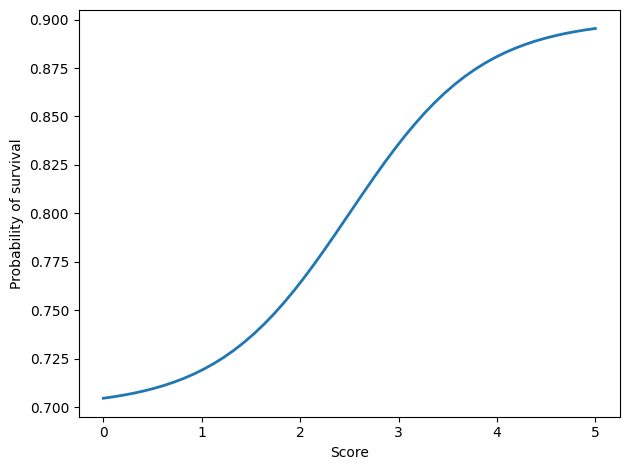

In [17]:
survive = 0.5
scores = np.linspace(0, 5)
probs = prob_survive(scores)
plt.plot(scores, probs)
decorate(xlabel='Score', ylabel='Probability of survival')

### The simulator

The biggest change in the simulator is in `step`, which runs `melee` to determine the fitness of each agent, and `prob_survive` to map from fitness to probability of surviving.


This code is made up of a mixture of O(n) code to create agents and steps for the simulator and O(1) code to run the simulation.

*See comment below each method for found complexity*

In [18]:
class PDSimulation(Simulation):

    def __init__(self, tournament, agents):
        """Create the simulation:

        tournament: Tournament object
        agents: sequence of agents
        """
        self.tournament = tournament
        self.agents = np.asarray(agents)
        self.instruments = []

        #Complexity O(1)

    def step(self):
        """Simulate a time step and update the instruments.
        """
        self.tournament.melee(self.agents)
        Simulation.step(self)

        #Complexity O(1)

    def choose_dead(self, fits):
        """Choose which agents die in the next timestep.

        fits: fitness of each agent

        returns: indices of the chosen ones
        """
        ps = prob_survive(fits)
        n = len(self.agents)
        is_dead = np.random.random(n) < ps
        index_dead = np.nonzero(is_dead)[0]
        return index_dead

        #Complexity O(n) where n is an array containing the fitness of each agent

We might want to start with random agents.

In [19]:
def make_random_agents(n):
    """Make agents with random genotype.

    n: number of agents

    returns: sequence of agents
    """
    agents = [Agent(np.random.choice(['C', 'D'], size=7))
              for _ in range(n)]
    return agents

    #Complexity O(n) where n is the number of agents we would like to create

Or with all identical agents.

In [20]:
def make_identical_agents(n, values):
    """Make agents with the given genotype.

    n: number of agents
    values: sequence of 'C' and 'D'

    returns: sequence of agents
    """
    agents = [Agent(values) for _ in range(n)]
    return agents

    #Complexity O(n) where n is the number of agents we would like to create

Here are the instruments to compute various metrics.

`Niceness` is the average number of `C` across the genotypes in the population.

In [21]:
class Niceness(Instrument):
    """Fraction of cooperation in all genotypes."""
    label = 'Niceness'

    def update(self, sim):
        responses = np.array([agent.values for agent in sim.agents])
        metric = np.mean(responses == 'C')
        self.metrics.append(metric)
    #Complexity O(n) where n is the number of agents we have to run through to get our data

`Opening` is the fraction of agents that cooperate in the first round.

In [22]:
class Opening(Instrument):
    """Fraction of agents that cooperate on the first round."""
    label = 'Opening'

    def update(self, sim):
        responses = np.array([agent.values[0] for agent in sim.agents])
        metric = np.mean(responses == 'C')
        self.metrics.append(metric)
    #Complexity O(n) where n is the number of agents we have to run through to get our data

`Retaliating` is the difference between (1) the fraction of agents that defect after the opponent defects and (2) the fraction of agents that defect after the opponent cooperates.

In [23]:
class Retaliating(Instrument):
    """Tendency to defect after opponent defects."""
    label = 'Retaliating'

    def update(self, sim):
        after_d = np.array([agent.values[2::2] for agent in sim.agents])
        after_c = np.array([agent.values[1::2] for agent in sim.agents])
        metric = np.mean(after_d == 'D') - np.mean(after_c == 'D')
        self.metrics.append(metric)
    #Complexity O(n) where n is the number of agents we have to run through to get our data

Forgiving is the difference between the number of agents that cooperate after DC minus the number that cooperate after CD.

In [24]:
class Forgiving(Instrument):
    """Tendency to cooperate if opponent cooperates after defecting."""
    label = 'Forgiving'

    def update(self, sim):
        after_dc = np.array([agent.values[5] for agent in sim.agents])
        after_cd = np.array([agent.values[4] for agent in sim.agents])
        metric = np.mean(after_dc == 'C') - np.mean(after_cd == 'C')
        self.metrics.append(metric)
    #Complexity O(n) where n is the number of agents we have to run through to get our data

Here's another metric intended to measure forgiveness.

In [25]:
class Forgiving2(Instrument):
    """Ability to cooperate after the first two rounds."""
    label = 'Forgiving2'

    def update(self, sim):
        after_two = np.array([agent.values[3:] for agent in sim.agents])
        metric = np.mean(np.any(after_two=='C', axis=1))
        self.metrics.append(metric)
    #Complexity O(n) where n is the number of agents we have to run through to get our data

Plot results is used to show the results overtime for the steps in the simulation

In [26]:
def plot_result(index, **options):
    """Plots the results of the indicated instrument.

    index: integer
    """
    sim.plot(index, **options)
    instrument = sim.instruments[index]
    print(np.mean(instrument.metrics[1000:]))
    decorate(xlabel='Time steps',
                     ylabel=instrument.label)
    #Complexity O(1)

# Pre Designed Simulation
To help explain how the tournament simulation works we created one that runs a tournament of only our backstabbing agent to see what happens with that. To start below we define a tournament with 100 agents, 2500 steps evolution steps, and our backstabbing agent. We also run it with a specific seed to get the same results each time (for demonstration purposes).

This section contains no complexity analysis as it calls classes and functions to make up where is needed.

In [27]:
tour = Tournament()

# User Input
number = 100
steps = 2500

#Makes Agents
agents = make_identical_agents(number, list('CDCDCDC'))

#Starts Simulation
sim = PDSimulation(tour, agents)

#Adds Trackers
sim.add_instrument(MeanFitness())
sim.add_instrument(Niceness())
sim.add_instrument(Opening())
sim.add_instrument(Retaliating())
sim.add_instrument(Forgiving())

NameError: name 'agent' is not defined

In [ ]:
#Runs simulations with a seed
np.random.seed(17)
sim.run(steps)

The graph below shows that, while at the start our mean score was low, and for a bit it plummited to nearly 1 score per agent, eventually the score ended up around 2.5

In [ ]:
#Displays Mean Fitness
plot_result(0, color='C0')
plt.show('figs/chap12-1')

The Graph below here shows that the niceness of the agents as constantly fluctuating in a small range but most agents ended up being relatively nice.

In [ ]:
#Shows Niceness (Average number of Cooperators across all agents)
plot_result(1, color='C1')

The graph below here shows that all of our agents started by cooperating at first (which was known) but eventually moved to being mostly but not entirely made up of agents who cooperated at first.

In [ ]:
#Shows Opening (Agents who started with cooperation)
plot_result(2, color='C2')

The graph below shows that, despite not starting with any retaliation, the agents eventually began to be made up of equally as many agents who retaliated as thos who didn't.

In [ ]:
#Shows Retaliation (Difference between agents who defect after defection and cooperate after defection)
plot_result(3, color='C3')

At first none of our agents were considered forgiving, yet over time this too moved toward ab equalibrium of forgiving agents and unforgiving ones.

In [ ]:
#Shows average amount of agents who forgive a round or two after defection
plot_result(4, color='C4')

And last but not least, this shows that our agents ended up as mostly fully cooperative agents with minor tweaks. Our top three were one that retaliates only after memory has been fully established. One That defects at the start and one that backstabs the opponent if they cooperated at the start.

In [ ]:
from pandas import Series

responses = [''.join(agent.values) for agent in sim.agents]
Series(responses).value_counts()

All in all this shows us that over time in a group of agents who begin by always betraying each other they will end up mostly cooperating, only having slight backstabbing tendencies that optimize the points. (See our second most poulated group which takes advantage of the openness of other agents.)

# Round Robin Playoffs (ADDED)

This is a mixture of code already seen and new code for a round robin tournament with a time complexity of O($n^{2}$).

*See comment below each method to for found complexity.*

In [ ]:
class PairwiseRoundRobinTournament:
    def __init__(self, payoffs, num_rounds=6):
        """
        Initialize the Pairwise Round-Robin Tournament.
        payoffs: dict
            Payoff matrix for the Prisoner's Dilemma.
        num_rounds: int
            Number of rounds for each pair.
        """
        self.payoffs = payoffs
        self.num_rounds = num_rounds

        #Complexity O(1)

    def play(self, agent1, agent2):
        """
        Play a sequence of iterated Prisoner's Dilemma rounds between two agents.
        agent1, agent2: Agent objects
        Returns:
            Tuple of scores (agent1_score, agent2_score).
        """
        agent1.reset()
        agent2.reset()
        for _ in range(self.num_rounds):
            resp1 = agent1.respond(agent2)
            resp2 = agent2.respond(agent1)
            pay1, pay2 = self.payoffs[resp1, resp2]
            agent1.append(resp1, pay1)
            agent2.append(resp2, pay2)
        return agent1.score, agent2.score
        #Complexity O(n) where n is the number of rounds in the tournament

    def round_robin(self, agents):
        """
        Conduct a full pairwise round-robin tournament.
        agents: list of Agent objects
        Updates agents' fitness values based on their average scores.
        """
        n = len(agents)
        totals = np.zeros(n)
        for i in range(n):
            for j in range(i, n):
                print(f"Agent {i} ({agents[i].values}) vs Agent {j} ({agents[j].values})")
                score1, score2 = self.play(agents[i], agents[j])
                totals[i] += score1
                totals[j] += score2
        for i in range(n):
            agents[i].fitness = totals[i] / (n - 1) / self.num_rounds   # Average score per agent

        #Complexity O(n^2) since each agent plays each other agent and itself in this code.

In [ ]:
class PDSimulationWithRoundRobin(PDSimulation):
    def __init__(self, tournament, agents):
        super().__init__(tournament, agents)
        #Complexity O(1)

    def step(self):
        """
        Run one step of the simulation.
        """
        # Run the full pairwise round-robin tournament
        self.tournament.round_robin(self.agents)
        Simulation.step(self)
        #Complexity O(1)

In [ ]:
payoffs = {('C', 'C'): (3, 3),
           ('C', 'D'): (0, 5),
           ('D', 'C'): (5, 0),
           ('D', 'D'): (1, 1)}
tour = PairwiseRoundRobinTournament(payoffs)
tour.play(all_d, all_c)

In [ ]:
agents = [all_c, all_d, tft, back, nf, StartDef]

tour.round_robin(agents)

In [ ]:
for agent in agents:
  print(agent.values, agent.fitness)

#Conclusion/Discussion
The Prisoner’s Dilemma is a widely studied framework for understanding behaviors like cooperation and competition (Vinney, 2024). It has real-world applications in psycology, economics, and bussines (Picardo, 2024). Simulations like ours offer a way to explore how different strategies evolve and adapt over time, providing insights into important questions: Why do people cooperate? How do competitive behaviors emerge? What makes a strategy successful in different environments?

Our work showed that individual choices can have a big impact on group outcomes. This is important for understanding systems like social cooperation, resource-sharing, and even strategic decision-making in competitive scenarios.
This project explored simulations of the Prisoner's Dilemma to study how different strategies interact and evolve over time. By implementing various agent behaviors, including Always Cooperate, Always Defect, Tit-for-Tat, and new strategies like Backstabbing, No Forgiveness, and Start Defection, we gained insight into how these strategies compete and adapt in a population. Enhancements such as the Round-Robin Tournament method allowed us to analyze these interactions more thoroughly and eliminate biases that existed in the original Melee Tournament setup.

The Round-Robin Tournament was a key improvement because it ensured every agent interacted with every other agent in the population. This provided a fair evaluation of strategy performance by comparing each strategy’s effectiveness against the entire group. In contrast, the Melee Tournament only considered a limited number of interactions, which could skew results based on random pairings. The results from these simulations showed that balanced strategies like Tit-for-Tat tend to perform well in cooperative environments, while exploitative strategies like Backstabbing thrive only under specific conditions.
While this project explored important ideas, there are several directions we could take to expand this work:

* Memory-Size-Three Agents: Future work could involve agents that base their decisions on longer histories. This would allow for more complex strategies that detect patterns in opponent behavior over time. Adding this feature would require storing more data for each agent and adjusting their decision-making process. Specifically adding one more turn of memory would require each agent to expand to a string of 16 characters instead of 7. This is because storing three turns of memory when each have 2 choices mean the options for possible three turns is $3^{2} = 9$

* New Interactions: Adding more genomes and agent types would provide a richer set of interactions and provide insights into the performance of strategies in varied competitive settings. This would make the simulation not only more comprehensive but also more reflective of real-world complexities. Another option for a new interaction would be adding a number that randomly decides what the response is.

* Real-World Applications: Applying the simulation to real-world data, like social networks, could show how these principles work in actual systems and help us make predictions.

This project demonstrated the power of simulations for studying strategic interactions in populations. By adding features like the Round-Robin Tournament and memory-based strategies, we deepened our understanding of how cooperation and competition evolve. Expanding this work to include more complex strategies, dynamic environments, or real-world applications could uncover even more insights into the factors that shape behaviors in populations. These findings have practical importance, offering lessons for understanding cooperation and competition in a wide range of systems, from ecosystems to human societies.

Below you can find a segment of code that will let you execute a Prisoner's Dilemma problem with your own step length, agent, and number of agents.


## Inputable Code

Here's a simulation that runs a chosen amount of a chosen agent (or random).


In [ ]:
tour = Tournament()

# User Input
agent = input("Input your 7 letter character string or 'random' for a random group:")
number = int(input("Input your number of agents:"))
steps = int(input("Enter the number of steps you want the sim to run for:"))

#Makes Agents
if agent == "random":
  agents = make_random_agents(number)
else:
  agents = make_identical_agents(number, list(agent))

#Starts Simulation
sim = PDSimulation(tour, agents)

#Adds Trackers
sim.add_instrument(MeanFitness())
sim.add_instrument(Niceness())
sim.add_instrument(Opening())
sim.add_instrument(Retaliating())
sim.add_instrument(Forgiving())

Run the simulation.  If you get a warning about `Mean of empty slice`, that's ok.

In [ ]:
#Runs simulations with a seed
np.random.seed(17)
sim.run(steps)

And let's look at some results.

In [ ]:
#Displays Mean Fitness
plot_result(0, color='C0')
plt.show('figs/chap12-1')

In [ ]:
#Shows Niceness (Average number of Cooperators across all agents)
plot_result(1, color='C1')

In [ ]:
#Shows Opening (Agents who started with cooperation)
plot_result(2, color='C2')

In [ ]:
#Shows Retaliation (Difference between agents who defect after defection and cooperate after defection)
plot_result(3, color='C3')

In [ ]:
#Shows average amount of agents who forgive a round or two after defection
plot_result(4, color='C4')

The following cells explore the composition of the final population.  But because the distribution of agents varies so much over time, the details of a single timestep might not mean much.

Here are the final genomes:

In [ ]:
from pandas import Series

responses = [''.join(agent.values) for agent in sim.agents]
Series(responses).value_counts()

## References
Kretz, T. (2010). A round-robin tournament of the iterated prisoner’s dilemma with complete memory-size-three strategies. Complex Systems, 19(4), 363–389. https://doi.org/10.25088/complexsystems.19.4.363

Kuhn, S. (2019, April 2). Prisoner’s dilemma. Stanford Encyclopedia of Philosophy. https://plato.stanford.edu/entries/prisoner-dilemma/

Picardo, E. (2024, August 28). The prisoner’s dilemma in business and the economy. Investopedia. https://www.investopedia.com/articles/investing/110513/utilizing-prisoners-dilemma-business-and-economy.asp

Sussex Publishers. (n.d.). The prisoner’s dilemma in everyday life. Psychology Today. https://www.psychologytoday.com/us/blog/darwins-subterranean-world/202112/the-prisoners-dilemma-in-everyday-life

Tobin, J. (n.d.). The prisoner’s dilemma. University of Michigan Heritage Project. https://heritage.umich.edu/stories/the-prisoners-dilemma/

Vinney, C. (2024, August 29). What the prisoner’s dilemma teaches us about human behavior. Verywell Mind. https://www.verywellmind.com/prisoners-dilemma-8697893